In [1]:
import os
import fnmatch as fn
import numpy as np
import pandas as pd
import dbfread

import pandas_profiling as pp
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import font_manager, rc
%matplotlib inline

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from math import sin,cos,sqrt,atan2,radians 

import glob
import requests
import logging
import time
import googlemaps
import reverse_geocoder
import pprint
import folium
import zipfile
import json

matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호도 표시

# 한글 깨짐 방지 목적 #
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family = font_name)

import plotly
import cufflinks as cf
import plotly.graph_objs as go
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
from plotly.offline import init_notebook_mode, plot,iplot

init_notebook_mode(connected = True)
cf.go_offline()

import warnings
warnings.filterwarnings(action='ignore') # 경고 메시지를 숨길 때

# 1차 데이터 전처리

In [ ]:
path = 'Rawdata/소상공인데이터/'
csv_files = glob.glob(os.path.join(path+'*.csv'))
time_index = pd.date_range(start='3/1/2018', periods=5, freq='3M')

## 2018/09까지는 encoding이 utf-8 foramt ##

# 2018/03 #
sb = list()
for csv_file in csv_files[0:4]: 
    temp = pd.read_csv(csv_file,engine = 'python')
    sb.append(temp)

# 2018/06 #
sb2 = list()
for csv_file in csv_files[4:8]: 
    temp = pd.read_csv(csv_file,engine = 'python')
    sb2.append(temp)
    
new_sb = pd.concat(sb[0:len(sb)])
new_sb2 = pd.concat(sb2[0:len(sb2)])
new_sb['time'] = [time_index[0]] * len(new_sb)
new_sb2['time'] = [time_index[1]] * len(new_sb2)

# 2018/09 #
sb3 = list()
for csv_file in csv_files[8:12]:
    temp = pd.read_csv(csv_file,engine = 'python')
    sb3.append(temp)

# '2018/12'는 encoding이 euc-kr foramt
sb4 = list()
for csv_file in csv_files[12:16]:
    temp = pd.read_csv(csv_file,engine = 'python',encoding='euc-kr')
    sb4.append(temp)
    
new_sb3 = pd.concat(sb3[0:len(sb3)])
new_sb4 = pd.concat(sb4[0:len(sb4)])
new_sb3['time'] = [time_index[2]] * len(new_sb3)
new_sb4['time'] = [time_index[3]] * len(new_sb4)

# 2019/03 #
sb5_1 = pd.read_csv(csv_files[16],encoding='utf-8',engine='python')
sb5_2 = pd.read_csv(csv_files[17],encoding='utf-8',engine='python')
sb5_3 = pd.read_csv(csv_files[18],encoding='utf-8',engine='python')
sb5_4 = pd.read_csv(csv_files[19],encoding='utf-8',engine='python')

new_sb5 = pd.concat([sb5_1,sb5_2,sb5_3,sb5_4])
new_sb5['time'] = [time_index[4]] * len(new_sb5)

#full_sb = pd.concat([new_sb,new_sb2,new_sb3,new_sb4,new_sb5])
#full_sb.to_csv('소상공인데이터/total_small_businese.csv')

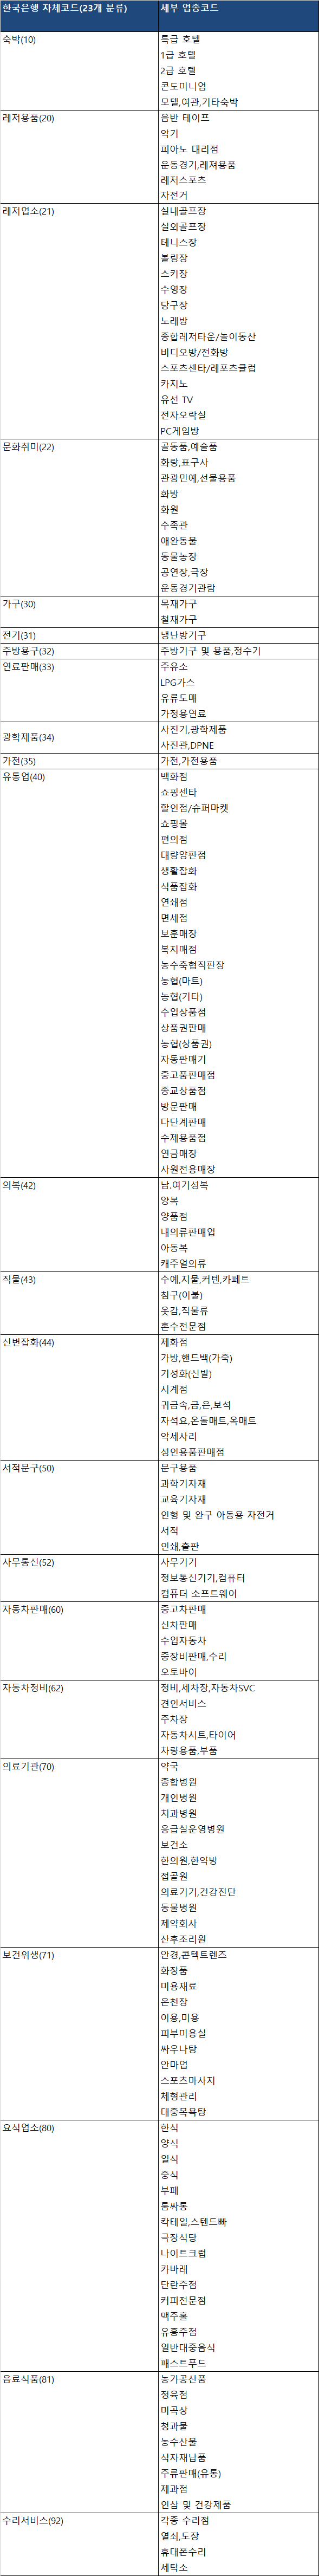

In [ ]:
new_sb.columns

## 종로,노원구의 상점들만 추출

In [ ]:
new_sb_revised = new_sb[(new_sb['시도명'] == '서울특별시') & (new_sb['시군구명'].isin(['종로구','노원구']))]
new_sb2_revised = new_sb2[(new_sb2['시도명'] == '서울특별시') & (new_sb2['시군구명'].isin(['종로구','노원구']))]
new_sb3_revised = new_sb3[(new_sb3['시도명'] == '서울특별시') & (new_sb3['시군구명'].isin(['종로구','노원구']))]
new_sb4_revised = new_sb4[(new_sb4['시도명'] == '서울특별시') & (new_sb4['시군구명'].isin(['종로구','노원구']))]
new_sb5_revised = new_sb5[(new_sb5['시도명'] == '서울특별시') & (new_sb5['시군구명'].isin(['종로구','노원구']))]

## 필요한 컬럼들만 추출

In [ ]:
new_sb_revised = new_sb_revised.loc[:,['상호명', '지점명', '상권업종대분류명','상권업종중분류명','상권업종소분류명',
'표준산업분류명','시도명','시군구명','행정동명','법정동명', '지번주소','건물명','도로명주소','경도', '위도', 'time']]

new_sb2_revised = new_sb2_revised.loc[:,['상호명', '지점명', '상권업종대분류명','상권업종중분류명','상권업종소분류명',
'표준산업분류명','시도명','시군구명','행정동명','법정동명', '지번주소','건물명','도로명주소','경도', '위도', 'time']]

new_sb3_revised = new_sb3_revised.loc[:,['상호명', '지점명', '상권업종대분류명','상권업종중분류명','상권업종소분류명',
'표준산업분류명','시도명','시군구명','행정동명','법정동명', '지번주소','건물명','도로명주소','경도', '위도', 'time']]

new_sb4_revised = new_sb4_revised.loc[:,['상호명', '지점명', '상권업종대분류명','상권업종중분류명','상권업종소분류명',
'표준산업분류명','시도명','시군구명','행정동명','법정동명', '지번주소','건물명','도로명주소','경도', '위도', 'time']]

new_sb5_revised = new_sb5_revised.loc[:,['상호명', '지점명', '상권업종대분류명','상권업종중분류명','상권업종소분류명',
'표준산업분류명','시도명','시군구명','행정동명','법정동명', '지번주소','건물명','도로명주소','경도', '위도', 'time']]

# 앞으로 소상공인 데이터의 핵심 
데이터양이 많아서 우선 시간대별로 데이터들을 생성하였다 소상공인의 대분류값에서 숙박, 의료는 신한카드 데이터의 숙박(10)과 의료기관(70)으로 일대일 대응할 수 있지만 다른 요소들은 {중분류명,소분류명}과 신한카드 분류군과의 대조를 통해서 작업해야한다.

In [ ]:
new_sb_revised['상권업종대분류명'].value_counts()

시간대별 상점 절대수를 살펴보면 큰 변화가 없음을 확인할 수 있다.

In [ ]:
print(len(new_sb_revised)) # 26070
print(len(new_sb2_revised)) # 26186
print(len(new_sb3_revised)) # 26748
print(len(new_sb4_revised)) # 27318
print(len(new_sb5_revised)) # 28481

In [ ]:
pd.DataFrame(new_sb['상권업종대분류명'].value_counts())

In [ ]:
new_sb_revised[new_sb_revised['상권업종대분류명'] == '소매']['상권업종중분류명'].value_counts()

# 1차 데이터 저장
데이터 양이 많으므로 전처리 하기 편하도록 시간대별로 상점들을 저장하였다.

In [ ]:
new_sb_revised.to_csv('가공데이터/소상공인_종로노원_201803.csv')
new_sb2_revised.to_csv('가공데이터/소상공인_종로노원_201806.csv')
new_sb3_revised.to_csv('가공데이터/소상공인_종로노원_201809.csv')
new_sb4_revised.to_csv('가공데이터/소상공인_종로노원_201812.csv')
new_sb5_revised.to_csv('가공데이터/소상공인_종로노원_201903.csv')